In [3]:
import pandas as pd
import seaborn as sb
import numpy as np
import datetime
import requests

df = pd.read_json('gme_completed.json', lines=True)
amc_stocks = pd.read_csv('AMC.csv')
wsb = pd.read_json('light_encode_wsb.json')

amc_stocks.drop(["Adj Close"], inplace=True, axis=1)
amc_stocks["Date"] = pd.to_datetime(amc_stocks["Date"])
wsb = wsb.rename(columns={'timestamp':'Date'})

In [45]:
amc_wsb = wsb[wsb['label'] == "AMC"]
merged_amc = pd.merge(amc_stocks, amc_wsb, how='inner',on='Date')
merged_amc

,Date,Open,High,Low,Close,Volume,label,score,comms_num
0,2021-01-28,11.980000,16.500000,6.510000,8.630000,591223900,AMC,38408,6027
1,2021-01-29,14.310000,16.000000,11.600000,13.260000,602193300,AMC,22404,7023
2,2021-02-01,17.000000,17.250000,12.910000,13.300000,434608000,AMC,122882,8710
3,2021-02-02,9.480000,10.100000,6.000000,7.820000,462775900,AMC,16928,3338
4,2021-02-03,8.850000,9.770000,7.890000,8.970000,221405100,AMC,97207,7629
...,...,...,...,...,...,...,...,...,...
105,2021-08-06,33.419998,33.580002,31.570000,32.700001,52858800,AMC,1000,2285
106,2021-08-09,32.680000,35.380001,32.349998,33.799999,81054600,AMC,3016,270
107,2021-08-10,36.900002,37.160000,31.440001,31.750000,116181500,AMC,1337,4328
108,2021-08-11,31.580000,31.910000,29.400000,31.549999,69684300,AMC,532,3268


<AxesSubplot:xlabel='Date', ylabel='High'>

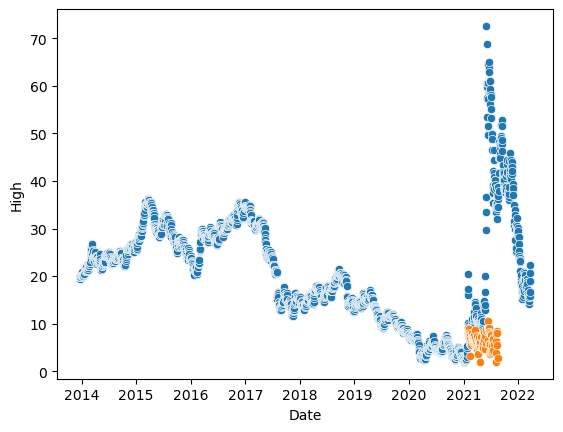

In [55]:
merged_amc['comms_num_log'] = np.log(merged_amc['comms_num'])
sb.scatterplot(data=amc_stocks, x='Date', y='High')
sb.scatterplot(data=merged_amc, x='Date', y='comms_num_log')

<AxesSubplot:title={'center':'This is a cool title'}, xlabel='Date', ylabel='High'>

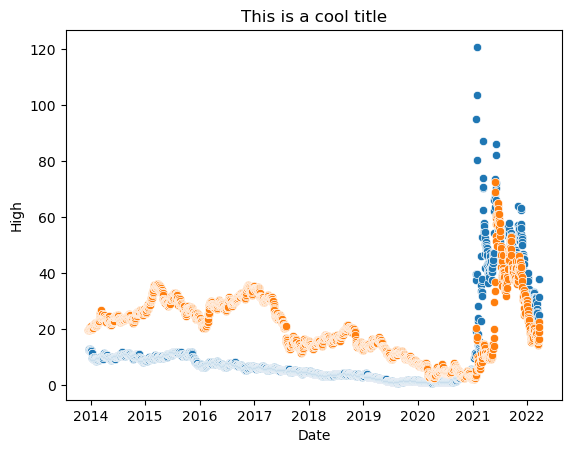

In [46]:
sb.scatterplot(data=df[(df['Date'] > '2013-12-18') & (df['Date'] < '2022-03-24')], x='Date', y='High').set_title("This is a cool title")
sb.scatterplot(data=amc_stocks, x='Date', y='High')

In [17]:
df[df['High'] == df['High'].max()]

,Date,Open,High,Low,Close,Volume
4772,2021-01-28,66.25,120.75,28.0625,48.400002,235263200.0


In [27]:




# Create monthly averages using a loop
monthlyAverages = {month: df[df['Date'].dt.month == i]['High'].mean() 
                   for i, month in enumerate(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 1)}

# Find the month with the highest average
highestMonth, highestValue = max(monthlyAverages.items(), key=lambda x: x[1])

monthlyAverages, highestMonth, highestValue




({'Jan': 8.875342714606743,
  'Feb': 8.462217096997689,
  'Mar': 9.877808756972113,
  'Apr': 9.833972748427673,
  'May': 9.571927732067506,
  'Jun': 10.51488803837953,
  'Jul': 9.701705275862063,
  'Aug': 9.847940573770492,
  'Sep': 9.79994723333334,
  'Oct': 9.269519634297518,
  'Nov': 9.70278612222222,
  'Dec': 8.78482488362069},
 'Jun',
 10.51488803837953)

0.10259646883179026

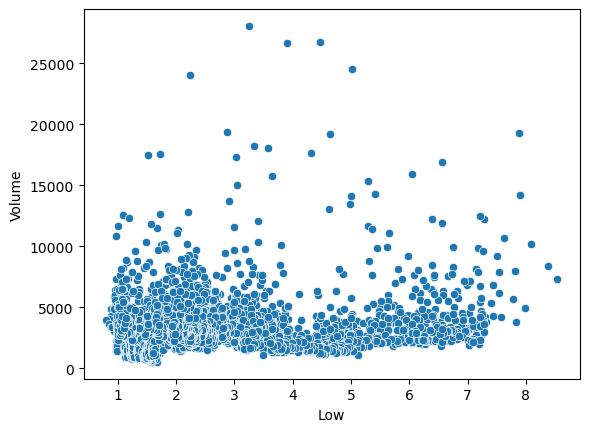

In [36]:
sb.scatterplot(data=df, x=np.sqrt(df['Low']), y=np.sqrt(df['Volume']))
df['Low'].corr(df['Volume'])

After examining the scatterplot for low vs volume, there appears to be no relationship between these variables. To confirm this, I calculated the pearson correlation coefficient and my hunch was right! The correlation coefficient is 0.1 which means that the direction of this relationship is positive and it's strength is very weak. In conclusion, there is no relationship between the low of the day and the volume of stock being traded.

<AxesSubplot:xlabel='Date', ylabel='High'>

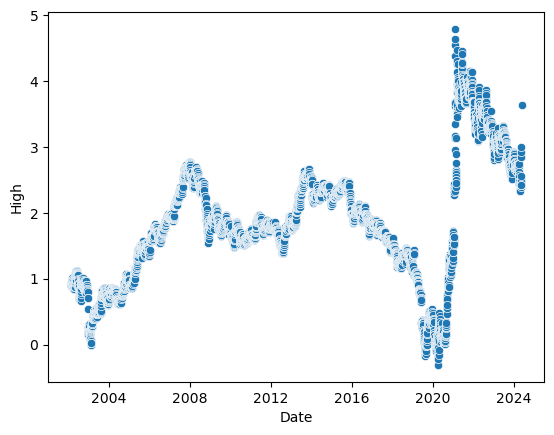

In [44]:
sb.scatterplot(data=df, x='Date', y=np.log(df['High']))

Simply, the date and high cannot have a relationship as date is a non-integer value and there appears to be no correlation between the date and high.

In [47]:
df.tail()

,Date,Open,High,Low,Close,Volume
5595,2024-05-07,15.850000,17.290001,14.930000,16.309999,24308600
5596,2024-05-08,16.049999,17.240000,15.330000,15.920000,24775100
5597,2024-05-09,15.900000,18.510000,15.350000,18.010000,25759300
5598,2024-05-10,17.930000,20.200001,16.879999,17.459999,36831900
5599,2024-05-13,26.340000,38.200001,24.770000,30.450001,182308700


In [16]:
total = 0
years = len(df['Date'].dt.year.unique())
for year in df['Date'].dt.year.unique():
    if year < 2024:
        total += len(df[df['Date'].dt.year == year])
    
print(total/years, "samples on average")

239.47826086956522 samples on average


In [6]:
data1 = {
    'id': [1, 2, 3, 4],
    'name': ['Tom', 'Jenny', 'James', 'Dan']
}

# Sample data for the second dataset
data2 = {
    'id': [2, 3, 4, 5],
    'age': [31, 20, 40, 70],
    'sex': ['F', 'M', 'M', 'F']
}

# Creating DataFrames
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Merging the DataFrames on the 'id' column
merged_df = pd.merge(df1, df2, on='id')

# Displaying the resulting DataFrame
merged_df

,id,name,age,sex
0,2,Jenny,31,F
1,3,James,20,M
2,4,Dan,40,M


In [4]:
tsla = pd.read_json("tsla.json")
musk = pd.read_json("musk.json")


In [8]:

tsla['Date'] = tsla['date']
tsla.head()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,...,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close,Date
0,2014-01-02,9.986667,10.165333,9.770000,10.006667,92826000,55.344071,54.440118,-37.373644,15.213422,...,9.820167,10.494240,9.674284,0.169472,9.740800,0.395333,0.402641,0.447550,9.970667,2014-01-02
1,2014-01-03,10.000000,10.146000,9.906667,9.970667,70425000,53.742629,53.821521,-81.304471,17.481130,...,9.826069,10.495693,9.680190,0.162623,9.776167,0.239333,0.379311,0.432677,9.800000,2014-01-03
2,2014-01-06,10.000000,10.026667,9.682667,9.800000,80416500,46.328174,50.870410,-123.427544,-37.824708,...,9.825047,10.496740,9.682577,0.141790,9.797900,0.344000,0.374267,0.426343,9.957333,2014-01-06
3,2014-01-07,9.841333,10.026667,9.683333,9.957333,75511500,53.263037,53.406750,-84.784651,-20.779431,...,9.830235,10.503407,9.688051,0.136402,9.837900,0.343334,0.369848,0.420414,10.085333,2014-01-07
4,2014-01-08,9.923333,10.246667,9.917333,10.085333,92448000,58.368660,55.423026,60.799662,43.570559,...,9.840239,10.511147,9.695964,0.140837,9.870167,0.329334,0.364060,0.413908,9.835333,2014-01-08


In [6]:
musk.head()

,Date,Tweet Count
0,2023-03-18,77
1,2023-05-07,76
2,2022-12-16,75
3,2022-11-23,69
4,2023-03-27,66


In [10]:
merged_df = pd.merge(tsla, musk, on='Date', how="inner")
merged_df.head()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,...,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close,Date,Tweet Count
0,2014-01-06,10.000000,10.026667,9.682667,9.800000,80416500,46.328174,50.870410,-123.427544,-37.824708,...,10.496740,9.682577,0.141790,9.797900,0.344000,0.374267,0.426343,9.957333,2014-01-06,2
1,2014-01-07,9.841333,10.026667,9.683333,9.957333,75511500,53.263037,53.406750,-84.784651,-20.779431,...,10.503407,9.688051,0.136402,9.837900,0.343334,0.369848,0.420414,10.085333,2014-01-07,1
2,2014-01-23,11.815333,12.158667,11.561333,12.100000,118011000,81.377569,71.893773,95.675937,112.464472,...,10.556940,9.925292,0.551802,10.479700,0.597334,0.551808,0.523853,11.640000,2014-01-23,1
3,2014-01-30,11.866667,12.318667,11.800667,12.189333,128475000,67.795699,65.500867,135.676579,91.117968,...,10.580413,10.099525,0.569731,10.878933,0.636667,0.580599,0.550491,12.094000,2014-01-30,1
4,2014-02-07,12.067333,12.442000,11.973333,12.435333,133927500,67.432967,64.506920,124.186582,164.314061,...,10.639707,10.311282,0.503743,11.484767,0.550000,0.549203,0.543070,13.104000,2014-02-07,1


<AxesSubplot:xlabel='high', ylabel='Tweet Count'>

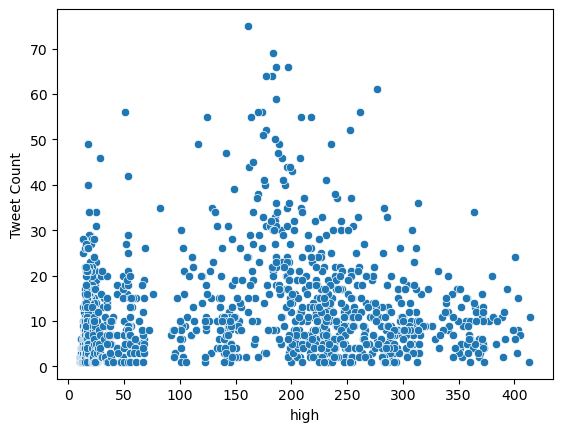

In [11]:
sb.scatterplot(data = merged_df, x='high', y='Tweet Count')